In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
files = {}
files['seq32'] = '/home/user/scpd_fff/bench/results2/seq32/time.prof'
files['seq64'] = '/home/user/scpd_fff/bench/results2/seq64/time.prof'
files['seq128'] = '/home/user/scpd_fff/bench/results2/seq128/time.prof'
files['seq256'] = '/home/user/scpd_fff/bench/256/results/seq/time.prof'
files['seq512'] = '/home/user/scpd_fff/bench/512/results/seq/time.prof'

In [3]:
def get_res(resfile, k, key='dimension'):
    import os
    import sys
    ret = {}

    with open(resfile, "r") as f:
        lines = [s.strip() for s in f.readlines()]
    funcs = ["GameAndFitness", "main", "crossover", "master", "slave", "manage_slaves"]

    for fn in funcs:
        ll = list(filter(lambda s: fn in s, lines))
        if ll:
            ret[fn]  = sum([int(l[l.index(":")+1:]) for l in ll])
        ret[key] = int(k)
    return ret
ftime512 = 6764006509

In [4]:
seqResults = {}
for k,v in files.items():
    print(k,v)
    seqResults[k] = get_res(v,k[3:])
seqResults = pd.DataFrame(seqResults).T
seqResults= seqResults.sort_values(by='dimension')
seqResults.loc['seq1024'] = seqResults.loc['seq512'].apply(lambda x:x*4)
seqResults.loc['seq1024']['dimension'] = 1024
seqResults.loc['seq2048'] = seqResults.loc['seq1024'].apply(lambda x:x*4)
seqResults.loc['seq2048']['dimension'] = 2048

seq256 /home/user/scpd_fff/bench/256/results/seq/time.prof
seq32 /home/user/scpd_fff/bench/results2/seq32/time.prof
seq512 /home/user/scpd_fff/bench/512/results/seq/time.prof
seq64 /home/user/scpd_fff/bench/results2/seq64/time.prof
seq128 /home/user/scpd_fff/bench/results2/seq128/time.prof


In [5]:
seqResults

,GameAndFitness,crossover,dimension,main
seq32,788170632841,801332826,32,787202109505
seq64,2906031184750,2846068753,64,2914316068621
seq128,11592018426673,11123131912,128,11618067687760
seq256,46240751572546,43730175402,256,46337018878324
seq512,184758961209706,173372053697,512,185134636278632
seq1024,739035844838824,693488214788,1024,740538545114528
seq2048,2956143379355296,2773952859152,2048,2962154180458112


In [6]:
files = {}
files['mpi256'] = '/home/user/scpd_fff/bench/256/results/mpi/seq/time.0.prof'
files['mpi512'] = '/home/user/scpd_fff/bench/512/results/mpi/seq/time.0.prof'
files['mpi2048'] = '/home/user/scpd_fff/bench/results2/mpi/seq_2048/time.0.prof'


mpiResults = {}
for k,v in files.items():
    print(k,v)
    mpiResults[k] = get_res(v,k[3:])

mpiResults = pd.DataFrame(mpiResults).T
mpiResults= mpiResults.sort_values(by='dimension')

s = set()
s.add('dimension')
funs = list(set(mpiResults.T.index) - s)
#for f in funs:
#    sn.lmplot('dimension', f, data=mpiResults)

mpiResults
m2048 = mpiResults.loc['mpi2048']
m2048

mpi256 /home/user/scpd_fff/bench/256/results/mpi/seq/time.0.prof
mpi512 /home/user/scpd_fff/bench/512/results/mpi/seq/time.0.prof
mpi2048 /home/user/scpd_fff/bench/results2/mpi/seq_2048/time.0.prof


dimension                   2048
manage_slaves    189563509675359
master           195512792911846
slave            189563509675359
Name: mpi2048, dtype: int64

In [7]:
files = {}
files['shm256'] = '/home/user/scpd_fff/bench/256/results/shm/time.prof'
files['shm512'] = '/home/user/scpd_fff/bench/512/results/shm/time.prof'


shmResults = {}
for k,v in files.items():
    print(k,v)
    shmResults[k] = get_res(v,k[3:])

shmResults = pd.DataFrame(shmResults).T
shmResults= shmResults.sort_values(by='dimension')
s = set()
s.add('dimension')
funs = list(set(shmResults.T.index) - s)
print(funs)
#for f in funs:
    #sn.lmplot('dimension', f, data=shmResults)

#shmResults

shm512 /home/user/scpd_fff/bench/512/results/shm/time.prof
shm256 /home/user/scpd_fff/bench/256/results/shm/time.prof
['crossover', 'main', 'GameAndFitness']


In [8]:
files = {}
files['mpi4'] = '/home/user/scpd_fff/bench/results2/mpi/seq4/time.0.prof'
#files['mpi6'] = '/home/user/scpd_fff/bench/results2/mpi/seq6/time.0.prof'
files['mpi8'] = '/home/user/scpd_fff/bench/results2/mpi/seq8/time.0.prof'
files['mpi12'] = '/home/user/scpd_fff/bench/results2/mpi/seq12/time.0.prof'
files['mpi16'] = '/home/user/scpd_fff/bench/results2/mpi/seq16/time.0.prof'
files['mpi20'] = '/home/user/scpd_fff/bench/results2/mpi/seq20/time.0.prof'
files['mpi24'] = '/home/user/scpd_fff/bench/512/results/mpi/seq/time.0.prof'

mpiResults = {}
for k,v in files.items():
    mpiResults[k] = get_res(v,k[3:], key='cores')

mpiResults = pd.DataFrame(mpiResults).T
mpiResults= mpiResults.sort_values(by='cores')
TIME = seqResults['main'].loc['seq512']
s = set()
s.add('cores')
funs = list(set(mpiResults.T.index) - s)
df = mpiResults.drop(['manage_slaves', 'slave'],axis=1)
df['speedup'] = df['master'].apply(lambda x: TIME/x)
df['efficiency'] = df['speedup'] / df['cores']
df['ideal'] = df['cores']
df

,cores,master,speedup,efficiency,ideal
mpi4,4,60494279739034,3.060366,0.765091,4
mpi8,8,26310988144369,7.036400,0.879550,8
mpi12,12,19895006485077,9.305583,0.775465,12
mpi16,16,16175235341189,11.445561,0.715348,16
mpi20,20,14301287226500,12.945313,0.647266,20
mpi24,24,12374541277786,14.960929,0.623372,24


Speedup MPI seq


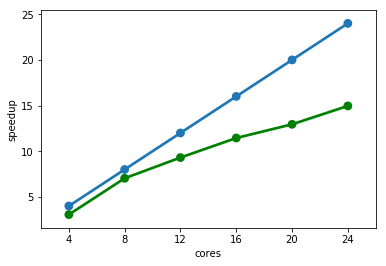

In [9]:
fig, ax = plt.subplots()
sn.pointplot('cores', 'ideal', data=df, ax=ax )
pl = sn.pointplot('cores', 'speedup', data=df, ax=ax, color='green')
print('Speedup MPI seq')
pl.get_figure().savefig('mpi_speedup.svg')

Efficiency MPI seq


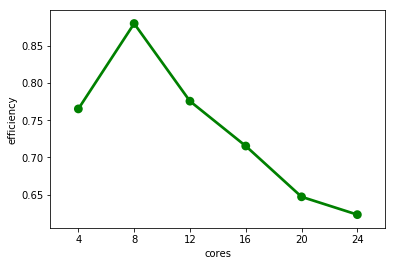

In [10]:
fig, ax = plt.subplots()
#sn.pointplot('cores', 'ideal', data=df, ax=ax )
pl = sn.pointplot('cores', 'efficiency', data=df, ax=ax, color='green')
pl.get_figure().savefig('mpi_efficency.svg')
print('Efficiency MPI seq')

In [11]:
files = {}
files['shm2'] = '/home/user/scpd_fff/bench/results3/shm_2p/time.prof' # 150g
files['shm4'] = '/home/user/scpd_fff/bench/results3/shm_4p/time.prof' # 150g
files['shm8'] = '/home/user/scpd_fff/bench/results3/shm_8p_512g_10it/time.prof' # 10g


shmResults = {}
for k,v in files.items():
    shmResults[k] = get_res(v,k[3:], key='cores')

shmResults = pd.DataFrame(shmResults)
shmResults['shm8'] = shmResults['shm8'] * 15
shmResults['shm8']['cores'] = 8
shmResults['shm8']['main'] -= ftime512*15
shmResults['shm4'] = shmResults['shm4'] * 30
shmResults['shm4']['cores'] = 4
shmResults['shm4']['main'] -= ftime512*30
shmResults['shm2'] = shmResults['shm2'] * 30
shmResults['shm2']['cores'] = 2
shmResults['shm2']['main'] -= ftime512*30
shmResults = shmResults.T
shmResults= shmResults.sort_values(by='cores')
shmResults['cores'] = shmResults['cores']
TIME = seqResults['main'].loc['seq512']
s = set()
s.add('cores')
funs = list(set(shmResults.T.index) - s)
df = shmResults.drop([],axis=1)
df['speedup'] = df['main'].apply(lambda x: TIME/x)
df['efficiency'] = df['speedup'] / (df['cores'])
df['ideal'] = df['cores']
df

,GameAndFitness,cores,crossover,main,speedup,efficiency,ideal
shm2,2317223859413790,2,10546375459110,96019349644080,1.928097,0.964049,2
shm4,83606099797470,4,308222537280,89260188315480,2.074101,0.518525,4
shm8,51364726261695,8,557607607110,56487690208485,3.277433,0.409679,8


Speedup SHM


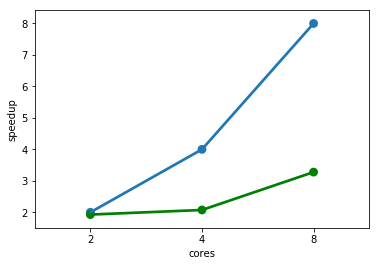

In [12]:
fig, ax = plt.subplots()
from pylab import *
#ax.set_xticks([0., 0.5, 1.])
sn.pointplot('cores', 'ideal', data=df, ax=ax )
pl = sn.pointplot('cores', 'speedup', data=df, ax=ax, color='green')
print('Speedup SHM')
pl.get_figure().savefig('speedup_shm.svg')

Efficiency SHM


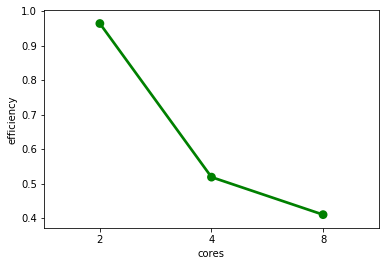

In [13]:
fig, ax = plt.subplots()
#sn.pointplot('cores', 'ideal', data=df, ax=ax )
pl = sn.pointplot('cores', 'efficiency', data=df, ax=ax, color='green')
pl.get_figure().savefig('efficency_shm.svg')
print('Efficiency SHM')

In [14]:
files = {}
files['com24'] = '/home/user/scpd_fff/cgl_mpi/2x4.time.0.prof' # 30g
files['com34'] = '/home/user/scpd_fff/cgl_mpi/3x4.time.0.prof' # 30g


mpiResults = {}
for k,v in files.items():
    mpiResults[k] = get_res(v,k[3:], key='cores')

mpiResults = pd.DataFrame(mpiResults)

mpiResults['com24'] = mpiResults['com24'] * 30
mpiResults['com24']['cores'] = 24
mpiResults['com24']['master'] -= ftime512*30

mpiResults['com34'] = mpiResults['com34'] * 30
mpiResults['com34']['cores'] = 24
mpiResults['com34']['master'] -= ftime512*30

mpiResults = mpiResults.T
mpiResults= mpiResults.sort_values(by='cores')
TIME = seqResults['main'].loc['seq512']
s = set()
s.add('cores')
funs = list(set(mpiResults.T.index) - s)
df = mpiResults.drop(['manage_slaves', 'slave'],axis=1)
df['speedup'] = df['master'].apply(lambda x: TIME/x)
df['efficiency'] = df['speedup'] / df['cores']
df['ideal'] = df['cores']
df

,cores,master,speedup,efficiency,ideal
com24,24,14142837696030,13.090346,0.545431,24
com34,24,31247650317720,5.924754,0.246865,24


In [15]:
# 2048
ftime = 58282321795 * 300 # time of first generation for 2048
ff = {}
ff['shm2048'] = '/home/user/scpd_fff/bench/results2/mpi/shm_2048.time.prof' # 5g
shmResults = {}
for k,v in ff.items():
    shmResults[k] = get_res(v,k[3:], key='cores')
ff = {}
ff['mpi2048'] = '/home/user/scpd_fff/cgl_mpi/2048.time.0.prof' # 5g
mpiResults = {}
for k,v in ff.items():
    mpiResults[k] = get_res(v,k[3:], key='cores')

df = pd.DataFrame([seqResults.loc['seq2048']])
shm = pd.DataFrame(shmResults).T*2*5*30
mpi = pd.DataFrame(mpiResults).T*2*5*30
del(shm['cores'])
shm['dimension'] = 2048
shm['main'] -= ftime
del(mpi['cores'])
mpi['main'] = mpi['master']
mpi['dimension'] = 2048

df = df.append(shm, sort=True).fillna(0)
df = df.append(mpi, sort=True).fillna(0)

df

,GameAndFitness,crossover,dimension,main,manage_slaves,master,slave
seq2048,2.956143e+15,2.773953e+12,2048,2962154180458112,0.000000e+00,0.000000e+00,0.000000e+00
shm2048,4.904214e+14,4.776687e+12,2048,446495072403000,0.000000e+00,0.000000e+00,0.000000e+00
mpi2048,0.000000e+00,0.000000e+00,2048,578170927986000,5.374913e+14,5.781709e+14,5.374913e+14


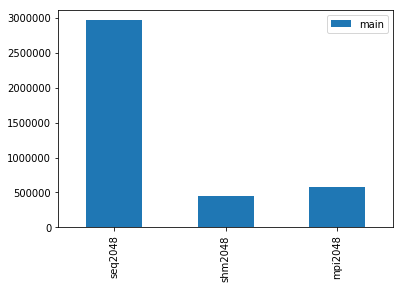

In [19]:
from scipy.stats import norm
dfp = pd.DataFrame(df['main']/10**9)
#dfp['c'] = [1,2,3]
#sn.distplot(dfp, kde=False, fit=norm)
ax = dfp.plot(kind='bar')
fig = ax.get_figure()
fig.savefig('2048.svg')


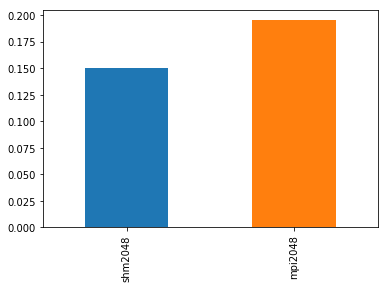

In [20]:
ax = dfp['main'].apply(lambda x: x / dfp['main']['seq2048']).drop('seq2048').plot(kind='bar')
fig = ax.get_figure()
fig.savefig('normalized_bar.svg')
